----

### Santander Coders 2023 | 2º semestre - DS (Turma #1114)

**Grupo:**  Demetrio Martins ,Gabriel Frenner , Gabriela Milagres, Miller Machado, Suzielli Mendonça

**Projeto**  
Machine Learning I   
Uso de modelos de Machine Learning para predição de derrame    
**Professor:** Tiago Marto

Dataset: [Stroke Prediction](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)     

**Objetivo:**  
Utilizar diferentes modelos de Machine Learning ([Regressão Logistica](https://en.wikipedia.org/wiki/Logistic_regression), [Random Forest](https://en.wikipedia.org/wiki/Random_forest) e [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost)) para classificar indivíduos quanto ao risco de sofrerem um AVC. O desempenho de cada estimador e modelagem foi feito por meio das métricas *recall* e *f1-score*, a fim de determinar qual método proporciona a melhor previsão.


**Sobre o conjunto de dados:**    
De acordo com a Organização Mundial da Saúde (OMS), o AVC é a 2ª principal causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.    
Esse conjunto de dados é usado para prever se um paciente tem probabilidade de ter AVC com base nos parâmetros de entrada, como sexo, idade, várias doenças e status de tabagismo. Cada linha nos dados fornece informações relativas sobre o paciente.

---

**Bibliotecas utilizadas no projeto:**
- [NumPy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Scikit-learn](https://scikit-learn.org/stable/)
- [Imbalanced-Learn](https://imbalanced-learn.org/stable/)

---

### **Leitura e visualização de dados:**

##### Importando Bibliotecas:

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, RandomizedSearchCV,  cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

#Ignorar Warnings nas saídas:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

##### Lendo o dataframe

In [189]:
df = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##### Verificando informações do Dataset

In [190]:
print(f"Temos {len(df.columns)} colunas nesse conjunto de dados. São elas:")
df.info()

Temos 12 colunas nesse conjunto de dados. São elas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


----

- **id:** identificador único
- **gender:** "Masculino", "Feminino" ou "Outro"
- **age:** idade do paciente
- **hypertension:** 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
- **heart_disease:** 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca
- **ever_married:** "Não" ou "Sim"
- **work_type:** "crianças", "Governo", "Nunca trabalhou", "Privado" ou "Autônomo"
- **Residence_type:** "Rural" ou "Urbano"
- **avg_glucose_level:** nível médio de glicose no sangue
- **bmi:** índice de massa corporal (IMC)
- **smoking_status:** status de tabagismo -> "fumante anterior", "nunca fumou", "fuma" ou "Desconhecido"*
- **stroke:** 1 se o paciente teve um derrame ou 0 se não    
**Nota: "Desconhecido" em status de tabagismo significa que a informação não está disponível para este paciente*

---

##### Verificando o balanceamento do Dataset:

In [191]:
balance = df['stroke'].value_counts(normalize=True)
print(f'#  Balanceamento\n1: {round(balance[1]* 100, 2)}%\n0: {round(balance[0] * 100, 2)}%')

#  Balanceamento
1: 4.87%
0: 95.13%


#### Verificação de valores nulos

In [192]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### Train-test split (para evitar vazamento de dados)


In [193]:
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42, stratify = y)

##### Correlação de cada variável (quanti) com a target

In [194]:
corr_feats_target = pd.concat([X_train, y_train], axis=1).drop(columns=['Residence_type', 'work_type', 'ever_married', 'gender','smoking_status']).corr()["stroke"]
corr_feats_target


age                  0.246029
hypertension         0.120188
heart_disease        0.141567
avg_glucose_level    0.123389
bmi                  0.034029
stroke               1.000000
Name: stroke, dtype: float64

##### Visualizando a distribuição dos dados em relação ao target (output)

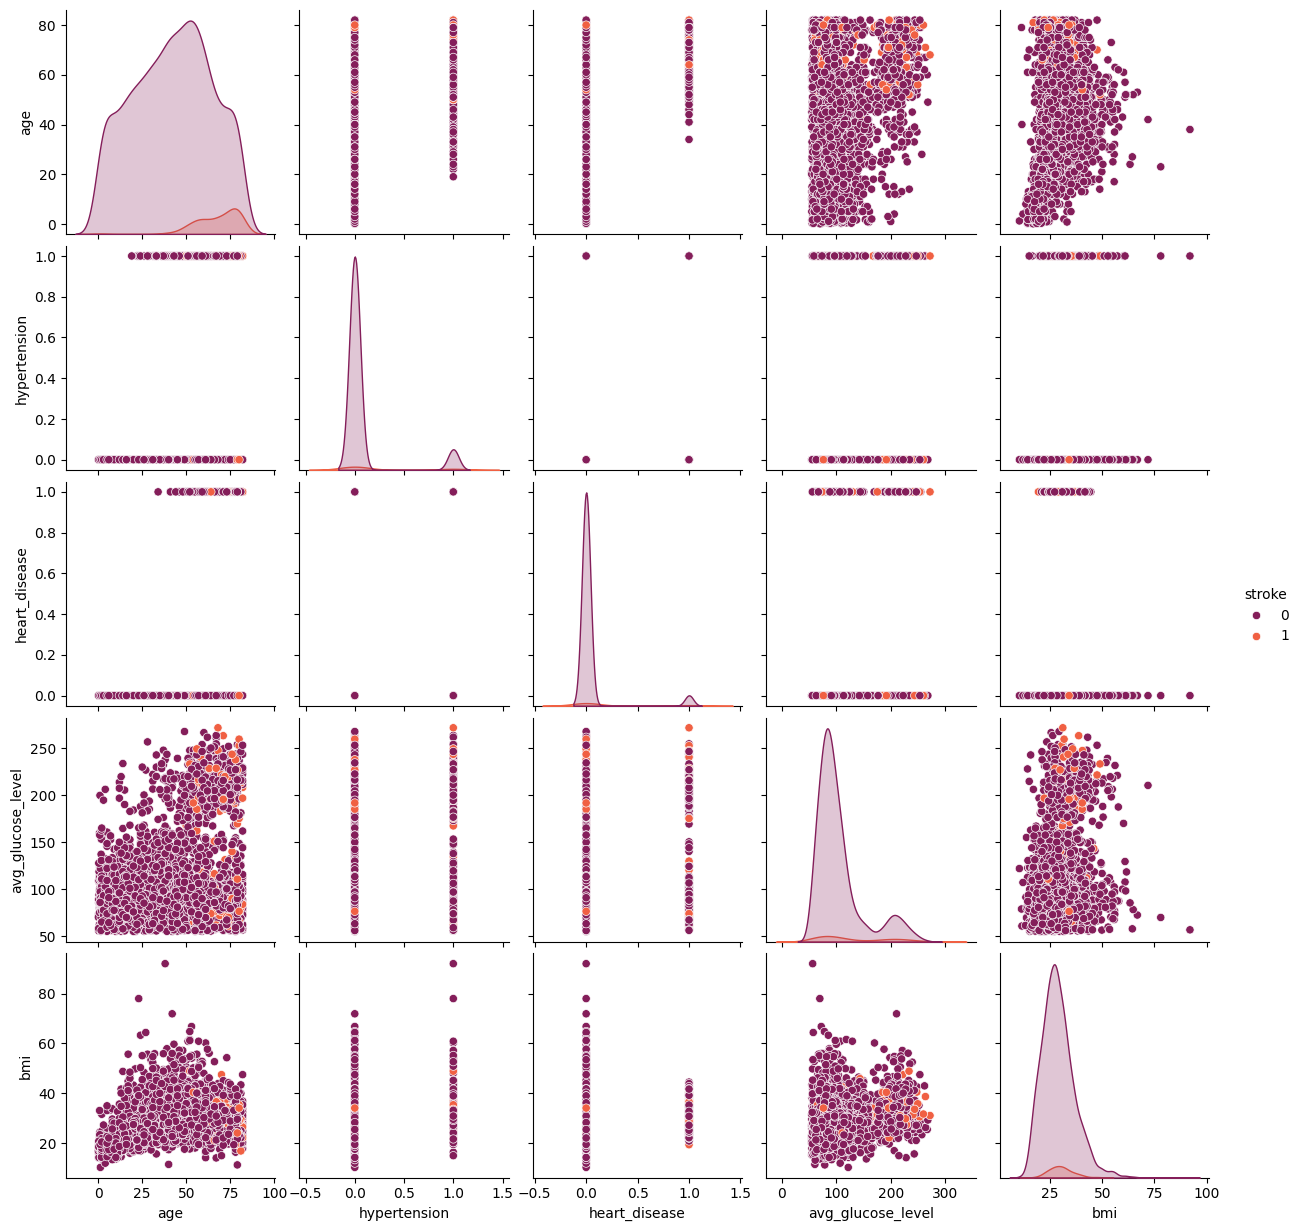

In [195]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='stroke', palette='rocket')

In [196]:
X_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,3577.000000,3577.000000,3577.000000,3577.000000,3429.000000
mean,43.250433,0.096170,0.053956,105.957414,28.867279
std,22.493077,0.294865,0.225962,44.945203,7.909601
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,26.000000,0.000000,0.000000,77.460000,23.500000
50%,45.000000,0.000000,0.000000,91.710000,28.000000
75%,61.000000,0.000000,0.000000,113.630000,33.100000
max,82.000000,1.000000,1.000000,271.740000,92.000000


#### Tratando os dados:

In [197]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2226,52.0,0,0,107.84,22.0,False,False,True,False,False,False,False,False,True,False,False
3927,62.0,0,0,88.32,36.3,False,False,True,False,True,False,False,True,False,False,False
3358,81.0,0,1,95.49,29.4,True,False,False,False,False,True,False,False,False,False,False
4152,55.0,0,0,73.57,28.0,True,False,True,False,False,True,False,False,False,False,True
4866,37.0,0,0,103.66,36.1,False,False,True,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,45.0,0,0,92.86,35.1,False,False,True,False,True,False,False,True,True,False,False
461,16.0,0,0,113.47,19.5,False,False,False,False,False,False,True,False,False,False,False
1052,61.0,0,0,78.65,36.2,False,False,True,False,True,False,False,False,True,False,False
152,80.0,0,0,76.57,34.1,False,False,True,False,False,True,False,True,False,True,False


##### Correlação das features com o target pós dummies:

In [198]:
corr_feats_target_dumm = pd.concat([X_train, y_train], axis=1).corr()["stroke"]
corr_feats_target_dumm

age                               0.246029
hypertension                      0.120188
heart_disease                     0.141567
avg_glucose_level                 0.123389
bmi                               0.034029
gender_Male                      -0.003005
gender_Other                     -0.003781
ever_married_Yes                  0.112897
work_type_Never_worked           -0.013119
work_type_Private                 0.001501
work_type_Self-employed           0.071302
work_type_children               -0.085319
Residence_type_Urban              0.005964
smoking_status_formerly smoked    0.059002
smoking_status_never smoked      -0.009552
smoking_status_smokes             0.018129
stroke                            1.000000
Name: stroke, dtype: float64

##### Preenchendo os nulos:

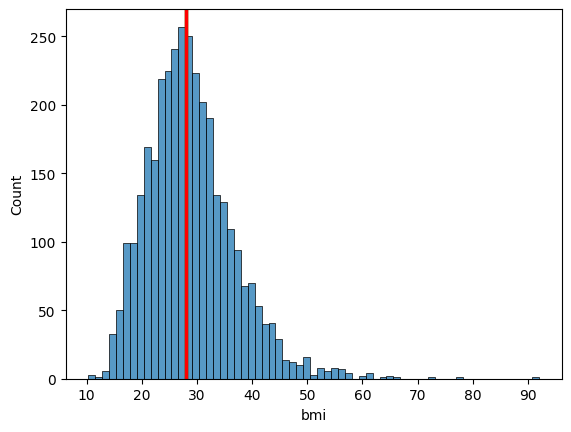

In [199]:
histrograma = sns.histplot(data=X_train['bmi'])
histrograma.axvline(x=int(X_train['bmi'].median()), c='g', ls='-', lw=2.5, label = 'Mediana')
histrograma.axvline(x=int(X_train['bmi'].mean()), c='r', ls='-', lw=2.5, label = 'Média')
plt.show()

In [200]:
bmi_median = X_train['bmi'].median()
X_train['bmi'].fillna(bmi_median, inplace=True)

In [201]:
print(X_train.isnull().sum())

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
gender_Other                      0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


##### Selecionando Features:

In [202]:
select = SelectKBest(score_func = chi2)
select.fit_transform(X_train, y_train)
select.scores_

array([2.53207458e+03, 4.67008322e+01, 6.78191117e+01, 1.03797054e+03,
       5.62428695e+00, 1.89104942e-02, 5.11313547e-02, 1.54987486e+01,
       6.13576256e-01, 3.45199131e-03, 1.51908175e+01, 2.25368432e+01,
       6.31055813e-02, 1.02557826e+01, 2.05302251e-01, 9.99835658e-01])

In [203]:
colunas_filtradas = select.get_support()
X_train = X_train[X_train.columns[colunas_filtradas]]
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_Yes,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_smokes
2226,52.0,0,0,107.84,22.0,True,False,False,True,False
3927,62.0,0,0,88.32,36.3,True,False,False,False,False
3358,81.0,0,1,95.49,29.4,False,True,False,False,False
4152,55.0,0,0,73.57,28.0,True,True,False,False,True
4866,37.0,0,0,103.66,36.1,True,False,False,False,True


#### Verificando Outliers:

In [204]:
X_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,43.250433,0.096170,0.053956,105.957414,28.831395
std,22.493077,0.294865,0.225962,44.945203,7.746121
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,26.000000,0.000000,0.000000,77.460000,23.700000
50%,45.000000,0.000000,0.000000,91.710000,28.000000
75%,61.000000,0.000000,0.000000,113.630000,32.700000
max,82.000000,1.000000,1.000000,271.740000,92.000000


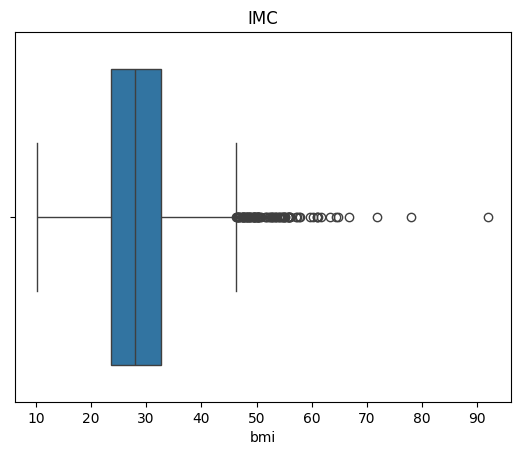

In [205]:
sns.boxplot(x=X_train["bmi"]).set_title("IMC")

plt.show()

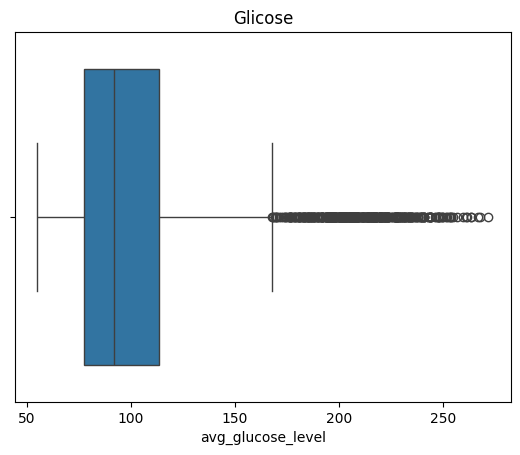

In [206]:
sns.boxplot(x=X_train["avg_glucose_level"]).set_title("Glicose")

plt.show()

In [207]:
print("\n Transformando os dados de teste:")

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

bmi_median_test = X_test['bmi'].median()
X_test['bmi'].fillna(bmi_median_test, inplace=True)

X_test = X_test[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'ever_married_Yes', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked', 'smoking_status_smokes' ]]
X_test


 Transformando os dados de teste:


,age,hypertension,heart_disease,avg_glucose_level,bmi,ever_married_Yes,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_smokes
4223,52.0,0,0,59.62,50.8,True,True,False,False,False
2230,8.0,0,0,89.57,18.8,False,False,True,False,False
4612,30.0,0,0,105.08,25.5,False,False,False,False,False
4100,17.0,0,0,109.39,26.3,False,False,False,False,False
2983,31.0,0,0,69.26,21.8,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
1765,5.0,0,0,70.00,18.6,False,False,True,False,False
3103,66.0,0,0,88.83,29.1,True,False,False,False,False
4522,52.0,1,0,116.62,28.3,True,False,False,False,True
624,65.0,0,1,58.37,28.0,True,True,False,False,True


In [275]:
#Substituindo True e False por 1 e 0:
colunas_binarias = ['ever_married_Yes', 'work_type_Self-employed',	'work_type_children', 'smoking_status_formerly smoked', 'smoking_status_smokes']
X_train[colunas_binarias] = X_train[colunas_binarias].astype(int)
X_test[colunas_binarias] = X_test[colunas_binarias].astype(int)

#### Modelo 1 - Ada Boosting sem Retirada de Outliers e sem rebalanceamento de classes

In [182]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("ab", AdaBoostClassifier(random_state=42))]

pipe = Pipeline(lista_etapas).fit(X_train, y_train)

grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(f1_score, pos_label=1)

results = cross_validate(estimator = pipe,
              X=X_train, y=y_train,
              cv=grupo, scoring=metrica)

df_results = pd.DataFrame(results)


Métricas de avaliação de treino:


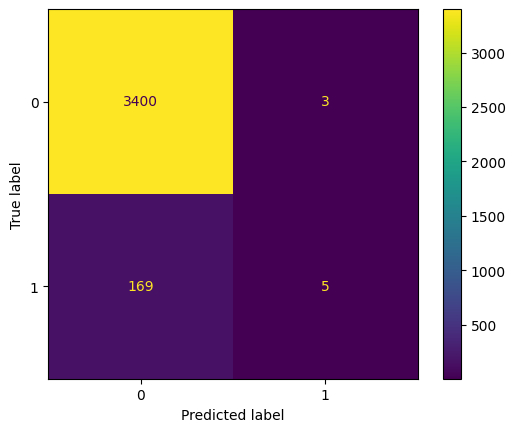

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3403
           1       0.62      0.03      0.05       174

    accuracy                           0.95      3577
   macro avg       0.79      0.51      0.52      3577
weighted avg       0.94      0.95      0.93      3577



In [183]:
print("\nMétricas de avaliação de treino:")

y_pred_train = pipe.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


Métricas de avaliação de teste:


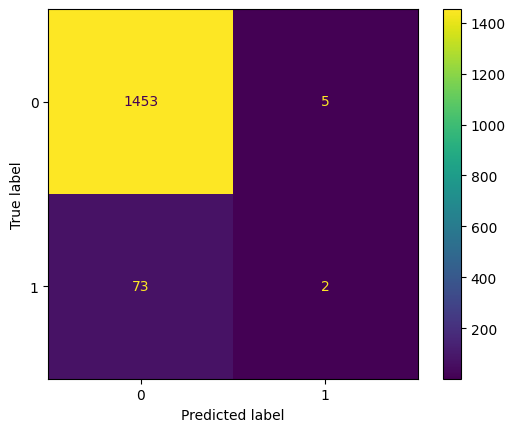

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.29      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.62      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533



In [184]:
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

#### Modelo 2 - Ada Boosting sem Retirada de Outliers e com rebalanceamento de classes

In [268]:
model=AdaBoostClassifier()

sme = SMOTEENN(random_state=42, sampling_strategy=0.3)

X_res, y_res = sme.fit_resample(X_train, y_train)


##### Verificando o balanceamento pós técnica SMOTEENN

In [269]:
balance = y_res.value_counts(normalize=True)
print(f'#  Balanceamento\n1: {round(balance[1]* 100, 2)}%\n0: {round(balance[0] * 100, 2)}%')

#  Balanceamento
1: 20.03%
0: 79.97%


##### Organizando o Grid:

In [270]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("ab", AdaBoostClassifier())]

pipe_ab = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica1 = make_scorer(recall_score, pos_label= 1)
metrica2 = make_scorer(f1_score, pos_label = 1)

scoring1={"recall" : metrica1 ,"f1" : metrica2}
my_refit_criteria = 'recall'

param_grid = {"ab__n_estimators" : range(25, 100, 10),
              "ab__learning_rate" : [0.1, 0.25, 0.4, 0.5, 0.75, 1]}

random_ab  = RandomizedSearchCV(estimator = pipe_ab,
                                param_distributions = param_grid,
                                scoring = metrica1,
                                cv = splitter,
                                n_iter=25,
                                verbose=10,
                                n_jobs=-1,
                                refit=my_refit_criteria)

random_ab.fit(X_res, y_res)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                             ('ab', AdaBoostClassifier())]),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'ab__learning_rate': [0.1, 0.25, 0.4,
                                                              0.5, 0.75, 1],
                                        'ab__n_estimators': range(25, 100, 10)},
                   refit='recall',
                   scoring=make_scorer(recall_score, response_method='predict', pos_label=1),
                   verbose=10)

In [271]:
random_ab.best_params_

{'ab__n_estimators': 85, 'ab__learning_rate': 0.75}

In [272]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("ab", AdaBoostClassifier(random_state=42, n_estimators=85, learning_rate=0.75))]

pipe_res = Pipeline(lista_etapas).fit(X_res, y_res)

grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(f1_score, pos_label=1)

results = cross_validate(estimator = pipe_res,
              X=X_res, y=y_res,
              cv=grupo, scoring=metrica)

df_results = pd.DataFrame(results)


Métricas de avaliação de treino:


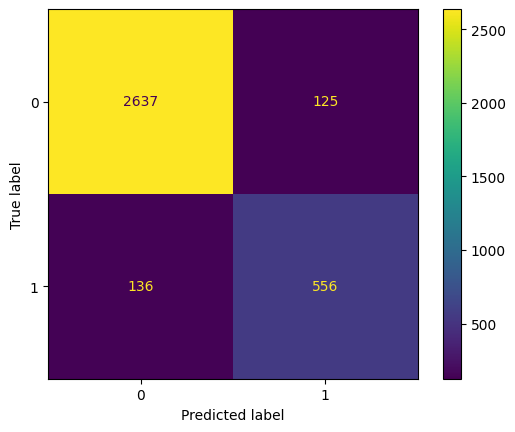

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2762
           1       0.82      0.80      0.81       692

    accuracy                           0.92      3454
   macro avg       0.88      0.88      0.88      3454
weighted avg       0.92      0.92      0.92      3454



In [273]:
print("\nMétricas de avaliação de treino:")

y_pred_train_res = pipe_res.predict(X_res)

ConfusionMatrixDisplay.from_predictions(y_res, y_pred_train_res)
plt.show()

print(classification_report(y_res, y_pred_train_res))


Métricas de avaliação de teste:


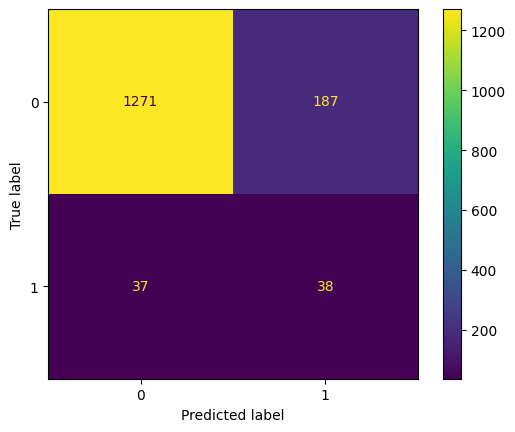

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1458
           1       0.17      0.51      0.25        75

    accuracy                           0.85      1533
   macro avg       0.57      0.69      0.59      1533
weighted avg       0.93      0.85      0.89      1533



In [274]:
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_res = pipe_res.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_res)
plt.show()

print(classification_report(y_test, y_pred_test_res))

---------------------

#### Modelo 3 - Random Forest sem Retirada de Outliers e sem rebalanceamento de classes

In [223]:
#pipeline
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier(random_state=42))]


pipe_forest = Pipeline(lista_etapas).fit(X_train, y_train)

# Validação cruzada
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definindo a métrica de avaliação

metrica = make_scorer(recall_score, pos_label=1)

# Realizando a validação cruzada
results = cross_validate(estimator=pipe_forest,
                         X=X_train, y=y_train,
                         cv=grupo, scoring=metrica)


Métricas de avaliação de treino:


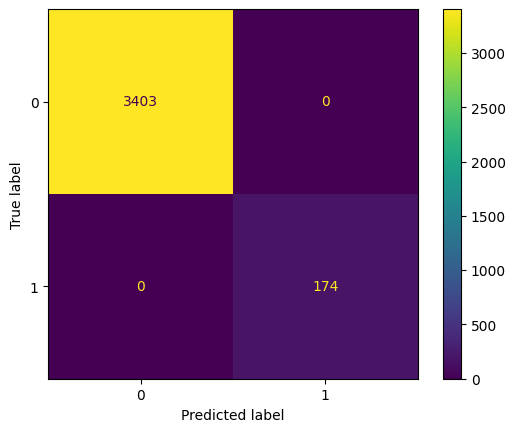

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3403
           1       1.00      1.00      1.00       174

    accuracy                           1.00      3577
   macro avg       1.00      1.00      1.00      3577
weighted avg       1.00      1.00      1.00      3577



In [224]:
print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_forest.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


Métricas de avaliação de teste:


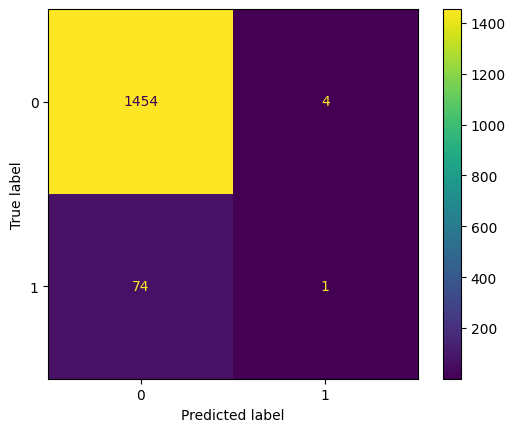

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.20      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.58      0.51      0.50      1533
weighted avg       0.91      0.95      0.93      1533



In [225]:
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_forest.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

####
----
####

#### Modelo 4 - Random Forest sem Retirada de Outliers e com rebalanceamento de classes

In [265]:
model = RandomForestClassifier(random_state=42)

sme = SMOTEENN(random_state=42, sampling_strategy=0.3)

X_res, y_res = sme.fit_resample(X_train, y_train)

#pipeline
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier(random_state=42))]


pipe_res = Pipeline(lista_etapas).fit(X_res, y_res)

# Validação cruzada
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definindo a métrica de avaliação

metrica = make_scorer(recall_score, pos_label=1)

# Realizando a validação cruzada
results = cross_validate(estimator=pipe_res,
                         X=X_res, y=y_res,
                         cv=grupo, scoring=metrica)


Métricas de avaliação de treino:


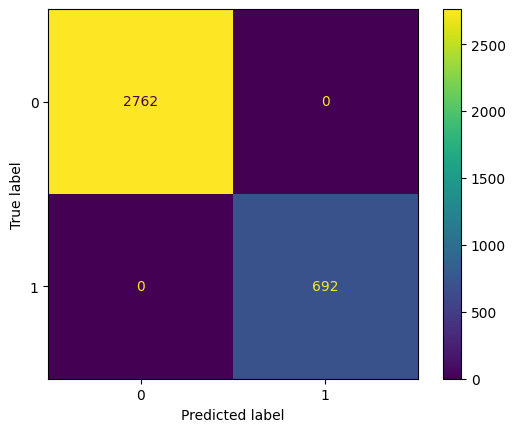

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2762
           1       1.00      1.00      1.00       692

    accuracy                           1.00      3454
   macro avg       1.00      1.00      1.00      3454
weighted avg       1.00      1.00      1.00      3454



In [266]:
print("\nMétricas de avaliação de treino:")

y_pred_train_res = pipe_res.predict(X_res)

ConfusionMatrixDisplay.from_predictions(y_res, y_pred_train_res)
plt.show()

print(classification_report(y_res, y_pred_train_res))


Métricas de avaliação de teste:


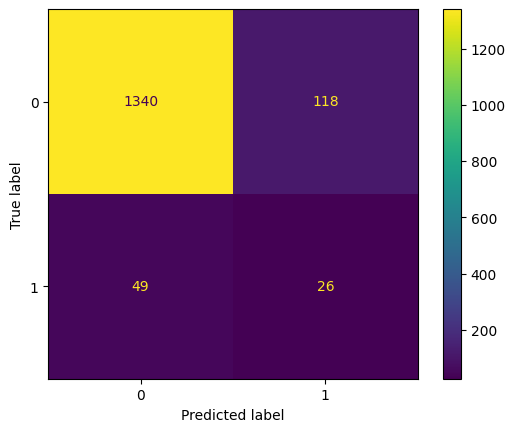

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1458
           1       0.18      0.35      0.24        75

    accuracy                           0.89      1533
   macro avg       0.57      0.63      0.59      1533
weighted avg       0.93      0.89      0.91      1533



In [267]:
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_res = pipe_res.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_res)
plt.show()

print(classification_report(y_test, y_pred_test_res))

####
----
####

#### Modelo 5 - Logistical Regression sem Retirada de Outliers e com rebalanceamento de classes

In [262]:
model = LogisticRegression()

sme = SMOTEENN(random_state=42, sampling_strategy=0.3)

X_res, y_res = sme.fit_resample(X_train, y_train)

#pipeline
lista_etapas = [("std_scaler", StandardScaler()), 
                ("lr", model)]


pipe_lr = Pipeline(lista_etapas).fit(X_res, y_res)

# Validação cruzada
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definindo a métrica de avaliação

metrica = make_scorer(recall_score, pos_label=1)

# Realizando a validação cruzada
results = cross_validate(estimator=pipe_lr,
                         X=X_res, y=y_res,
                         cv=grupo, scoring=metrica)


Métricas de avaliação de treino:


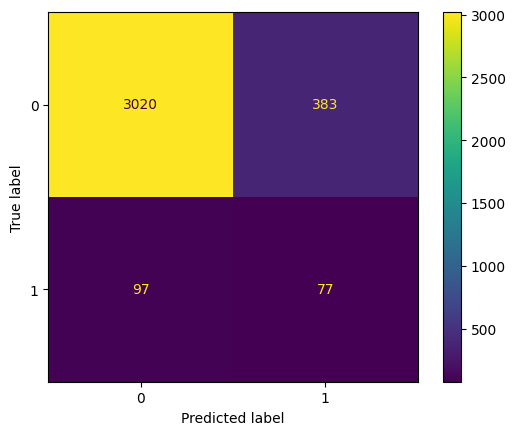

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3403
           1       0.17      0.44      0.24       174

    accuracy                           0.87      3577
   macro avg       0.57      0.66      0.58      3577
weighted avg       0.93      0.87      0.89      3577



In [263]:
print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_lr.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


Métricas de avaliação de teste:


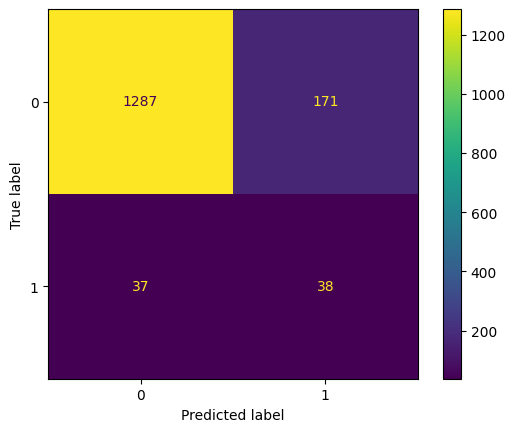

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      1458
           1       0.18      0.51      0.27        75

    accuracy                           0.86      1533
   macro avg       0.58      0.69      0.60      1533
weighted avg       0.93      0.86      0.89      1533



In [264]:
# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_lr.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

---

#### **Conclusões:**


- **Estimadores:**
    - AdaBoost
    - Random Forest
    - Regressão Logística

- **Técnica de balanceamento:**
    - SMOTEENN
    - sem balanceamento

- **Seleção de Features:**
    - SelectKBest

- **Dumificação de variáveis:**
    - Ferramentas do Pandas

- A base de dados contava com um pouco mais de **5000 linhas** e estava **altamente desbalanceada**(~5% do target);
- A técnica de balanceamento utilizada (**SMOTEENN**) demonstrou **melhoria nas métricas** em todas as modelagens (com diferentes estimadores) e manteve a identidade da base de dados original;
- Houve possível vazamento de dados na modelagem que usava Random Forest. A diferença significativa nas métricas do treino e do teste demonstram *overfitting*;
- Não obtivemos resultados satisfatórios para as métricas escolhidas;
- O estimador Regressão Logística se mostrou mais eficiente do que os demais;
- Não colocaríamos nenhuma das modelagens apresentadas em produção.

####
----
####

**Final do projeto**